## Predicting Car Prices: Using KNN Regression, K fold Validation and Hyperparameterization technique to choose best features and Parameters for predictive model

## A. Data Set Information

This data set consists of three types of entities: 
(a) the specification of an auto in terms of various characteristics, 
(b) its assigned insurance risk rating, 
(c) its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

## B. Data Exploration & Cleaning

In [43]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
pd.options.display.max_columns = 99
style.use("fivethirtyeight")

In [2]:
# Data set does not have column names hence add column names
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

Observation:
We have 10 numeric columns and 16 non numeric columns. There are 205 rows of data

In [4]:
# select only columns with numeric values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_clean = cars[continuous_values_cols]

### Data Cleaning

1. Replace rows with "?" character with null vaues
2. Treat Null values

In [5]:
cars_clean=cars_clean.replace("?",np.nan)
cars_clean=cars_clean.astype("float")

In [6]:
#check null values as absolute number and % of total
print("Total Null Values\n")

print(cars_clean.isnull().sum())
print("Percentage of Null values\n")
print((cars_clean.isnull().sum()/len(cars_clean))*100)

Total Null Values

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
Percentage of Null values

normalized-losses    20.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-size           0.00000
bore                  1.95122
stroke                1.95122
compression-rate      0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64


The normalized lossed column has 41 null values (20%) in the data set. The other columns have very few null values (less than 2%) so we will drop them

In [7]:
# normalized losses: replacing null values with mean of the column 
cars_clean["normalized-losses"]=cars_clean["normalized-losses"].fillna(cars_clean["normalized-losses"].mean())
cars_clean.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [8]:
# drop other null rows since they constitue less than 2% of total values

cars_clean=cars_clean.dropna()
cars_clean.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now that the basic data cleaning is over we will start preparing the data for KNN model. For KNN model it is essentail to normalize the data set so that there is no bias in calculating the distance. All numeric columsn would be normalized to have values between 0 to 1

### Normalize the Data

In [9]:
# Now we need to normalize all numeric columns
# Normalize all columnns to range from 0 to 1 except the target column.
target= cars_clean['price']
# normalize using min max technique
cars_clean = (cars_clean - cars_clean.min())/(cars_clean.max()-cars_clean.min())
cars_clean['price'] = target

In [10]:
cars_clean.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Multivariate KNN Regression using K fold validation technique

We will analyse the following aspects:
    1. We test each feature with the default number of neighbors and 5 folds and 10 folds
    2. We test each feature while varying the number of neighbors
    3. We test the best n-features at a time for default number of neighbors
    4. We repeat the previous analysis while varying the number of neighbors

In [11]:
# import required functions

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [12]:
# set the feature columns and target variable
features=cars_clean.columns.tolist()
features.remove("price")
#features
target="price"
#target

In [13]:
# create a function for returning RSME values

def train_test(features,target,df,k,n_splits):
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = (((cross_val_score(knn,df[[features]],
                              df[[target]],
                              scoring="neg_mean_squared_error",cv=kf))))
    rmses = np.sqrt(np.abs(mses))
    avg_rmses = np.mean(rmses)
    return avg_rmses

1. first we will check the avg RMSE value of each feature with 5 folds

In [14]:
avg_rmses={}
for col in features:
    avg_rmses[col]=train_test(col,target,cars_clean,5,5)
    
avg_rmses_list=pd.Series(avg_rmses).sort_values()
print (avg_rmses_list)

engine-size          3179.954680
city-mpg             3826.284150
highway-mpg          4150.205489
horsepower           4205.891973
curb-weight          4459.196293
width                4679.252576
length               4928.647015
wheel-base           5918.993230
compression-rate     6532.803966
bore                 6865.243783
stroke               7065.147752
normalized-losses    7173.474685
height               7536.893378
peak-rpm             7734.928237
dtype: float64


In [24]:
check_folds=[5,10]
multifold_5k_avg_rmses={}
for fold in check_folds:
    avg_rmses={}
    for col in features:
        avg_rmses[col]=train_test(col,target,cars_clean,5,fold)
    multifold_5k_avg_rmses[fold]= avg_rmses
sorted_features=pd.Series(avg_rmses).sort_values()
all_features=sorted_features.index

print("Features sorted from best (lowest) RMSE value to worst (highest)\n")
print (sorted_features)
print()
print (multifold_5k_avg_rmses)
print("list of features sorted\n")
print(all_features)

Features sorted from best (lowest) RMSE value to worst (highest)

engine-size          3058.042648
city-mpg             3771.570155
horsepower           3913.067672
curb-weight          4170.861334
highway-mpg          4195.073099
width                4385.136841
length               4610.793442
wheel-base           5472.774821
compression-rate     6352.748307
normalized-losses    6736.189428
bore                 6802.156433
stroke               7118.524668
peak-rpm             7484.715177
height               7606.852064
dtype: float64

{10: {'engine-size': 3058.042647623467, 'highway-mpg': 4195.073099109924, 'wheel-base': 5472.774821263308, 'length': 4610.79344209029, 'bore': 6802.156433183904, 'height': 7606.852064421553, 'normalized-losses': 6736.18942846507, 'city-mpg': 3771.5701553800413, 'curb-weight': 4170.861334339226, 'width': 4385.136841336567, 'horsepower': 3913.067671993799, 'peak-rpm': 7484.715176626365, 'compression-rate': 6352.74830722898, 'stroke': 7118.524668115389}, 

Observing the average RMSE values for each feature for 10 fold and 5 fold for 5 nearest neighbors reveals that 10 folds produces more accurate results.

## Hyperparameterization 

We will now check for accuracy of the model with different k values and feature combination which will lead to most accurate predictions

In [16]:
len(features)

14

In [38]:
def kfolds_multifeature_multi_neighbors(train_column,test_column,df):
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    k_dict = {}
    for k in range(1,10):
        knn = KNeighborsRegressor(n_neighbors=k)
        mses = (((cross_val_score(knn,df[train_column],
                              df[[test_column]],
                              scoring="neg_mean_squared_error",cv=kf))))
        rmses = np.sqrt(np.abs(mses))
        avg_rmses = np.mean(rmses)
        k_dict[k] = avg_rmses
    return k_dict

In [39]:
avg_rmse_multifeature_multi_k={}
for col in range(2,6):
    feature=all_features[:col]
    avg_rmse_multifeature_multi_k["{} best features".format(col)]=kfolds_multifeature_multi_neighbors(feature,"price",cars_clean)

In [40]:
avg_rmse_multifeature_multi_k

{'2 best features': {1: 3007.4027169316487,
  2: 2752.5839455553337,
  3: 2817.3279247094115,
  4: 2961.1825649985212,
  5: 3040.4509639280395,
  6: 3056.6022090131037,
  7: 3084.8556393194476,
  8: 3132.910831979608,
  9: 3162.786883887912},
 '3 best features': {1: 2848.828886174613,
  2: 2656.6295653313855,
  3: 2719.92021282515,
  4: 2694.836510608029,
  5: 2692.9162144047527,
  6: 2786.3639702845894,
  7: 2915.7144071681364,
  8: 3059.2864377015208,
  9: 3149.3637906604813},
 '4 best features': {1: 2326.1694893932413,
  2: 2476.3266916611033,
  3: 2608.987048860143,
  4: 2767.575145213654,
  5: 2939.846636270216,
  6: 3028.6308707473218,
  7: 3217.567106195419,
  8: 3155.8726671444065,
  9: 3286.9934978441647},
 '5 best features': {1: 2393.3660378920363,
  2: 2504.549852884963,
  3: 2688.597117803637,
  4: 2885.431082474732,
  5: 3017.2176718792093,
  6: 3179.2081874010964,
  7: 3312.6046769031427,
  8: 3277.6631510495727,
  9: 3336.1209886720876}}

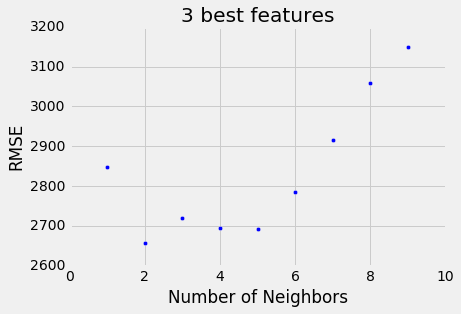

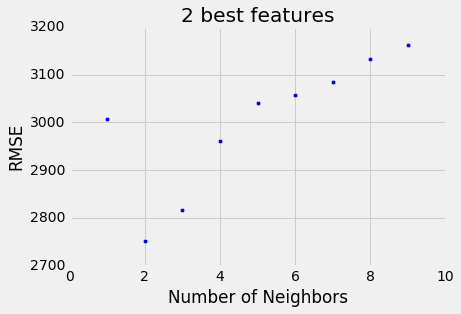

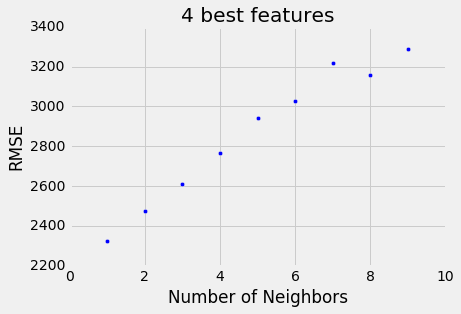

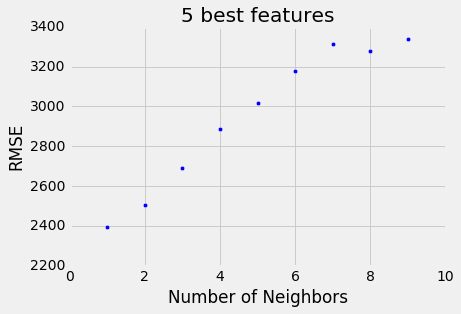

In [44]:
# Plot the RMSE values

fig, ax = plt.subplots()
for k,v in avg_rmse_multifeature_multi_k.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel("Number of Neighbors")
    plt.ylabel("RMSE")
    plt.title(k)
    plt.show()


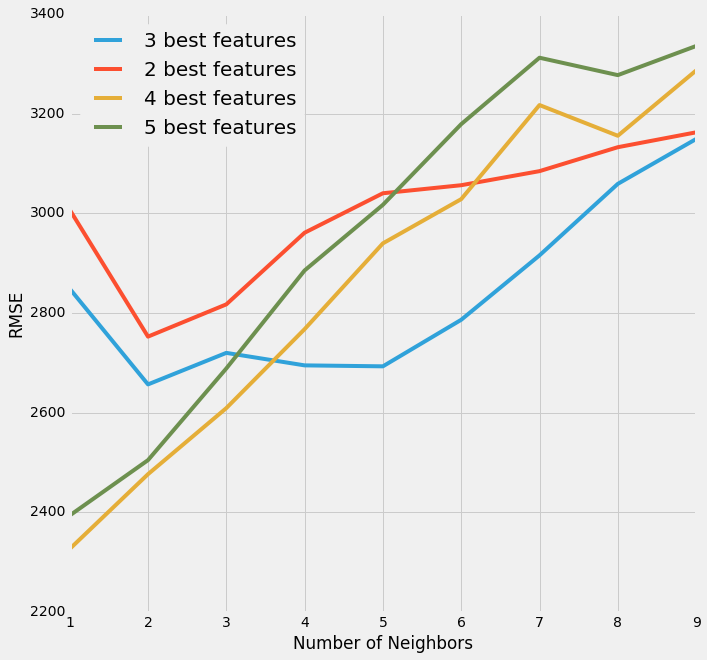

In [45]:
fig,ax = plt.subplots(figsize=(10,10))
for k,v in avg_rmse_multifeature_multi_k.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y,label=k)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.legend(loc="upper left",fontsize=20)

## Conclusion

Based on the RMSE values, selecting the 4 best features with K value of 2 and 10 fold will lead the most accurate results
The 4 features are 'engine-size', 'city-mpg', 'horsepower', 'curb-weight'